In [1]:
from manim import *
from numpy import linalg as npl
import math
import matplotlib.pyplot as plt
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching puv_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s puv_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.8


Output saved by creating file at animations/polar_unity_vectors/puv.mp4.


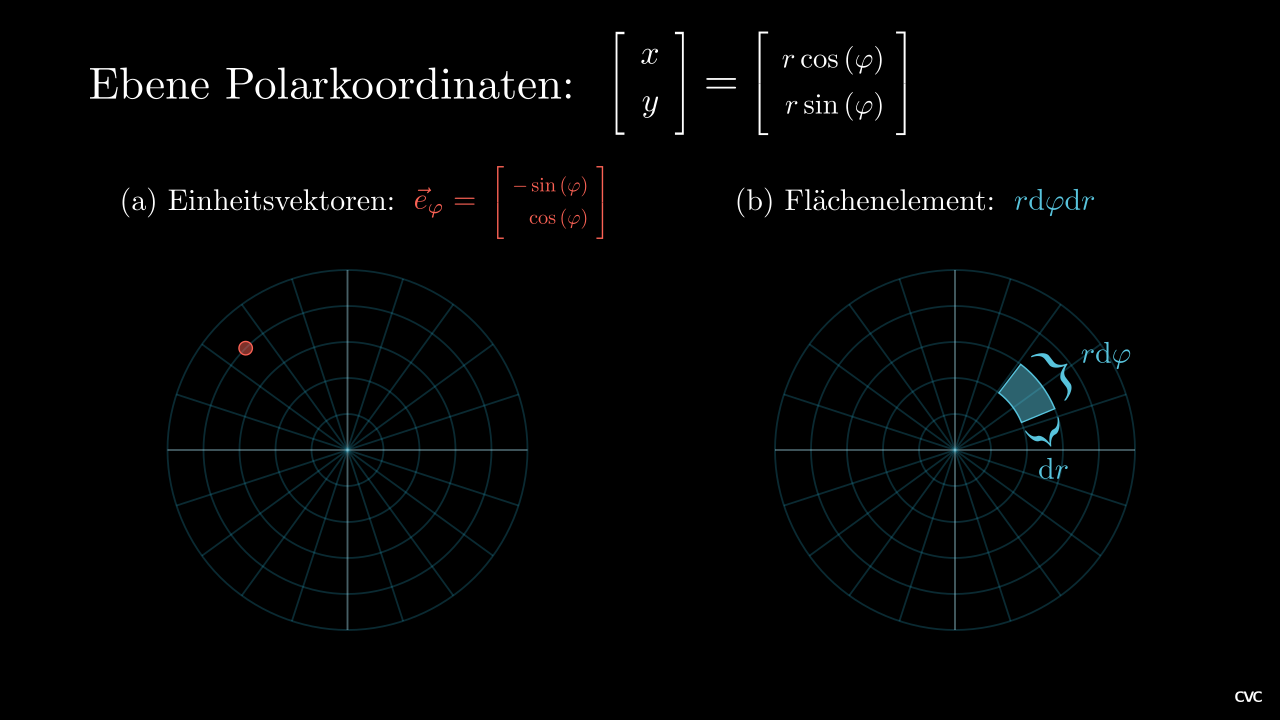

In [157]:
%%capture_video --path "animations/polar_unity_vectors/puv.mp4"
%%manim -qm --fps 60 $video_scene

class puv_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)


        # Header
        text_head = Tex(r"Ebene Polarkoordinaten:", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT + 0.25 * DOWN)
        text_head_matrix_cart = Matrix([[r'x'], [r'y']]).scale(0.75).next_to(text_head, 2*RIGHT)
        text_head_eq = Tex(r"$=$", font_size = 48).next_to(text_head_matrix_cart, RIGHT) 
        text_head_matrix_pol = Matrix([[r'r\cos{(\varphi)}'], [r'r\sin{(\varphi)}']]).scale(0.64).next_to(text_head_eq, RIGHT)
        text_head_group = VGroup(text_head, text_head_matrix_cart, text_head_eq, text_head_matrix_pol)


        # Text a: Einheitsvektoren
        text_a = Tex(r'(a) Einheitsvektoren:', font_size = 32).move_to([-4.25, 1.75, 0])
        text_a_er_half = Tex(r'(a) Einheitsvektoren:', font_size = 32).move_to([-4.25, 1.75, 0]).set_opacity(0.5)

        text_a_er = Tex(r'$\Vec{e}_r=$', font_size = 32, color = RED).next_to(text_a, RIGHT)
        text_a_er_matrix = Matrix([[r'\cos{(\varphi)}'], [r'\sin{(\varphi)}']]).set_color(RED).scale(0.45).next_to(text_a_er, RIGHT)
        text_a_er_group = VGroup(text_a_er, text_a_er_matrix)

        text_a_ephi = Tex(r'$\Vec{e}_\varphi=$', font_size = 32, color = RED).next_to(text_a, RIGHT)
        text_a_ephi_matrix = Matrix([[r'-\sin{(\varphi)}'], [r'\cos{(\varphi)}']]).set_color(RED).scale(0.45).next_to(text_a_ephi, RIGHT)
        text_a_ephi_group = VGroup(text_a_ephi, text_a_ephi_matrix)


        # Text b: Flächenelement
        text_b = Tex(r'(b) Flächenelement:', font_size = 32).move_to([2.5, 1.75, 0])
        text_b_half = Tex(r'(b) Flächenelement:', font_size = 32).move_to([2.5, 1.75, 0]).set_opacity(0.5)

        text_b_fe = Tex(r'$r\mathrm{d}\varphi\mathrm{d}r$', font_size = 32, color = BLUE).next_to(text_b, RIGHT)


        # Polare Ebenen
        ppla_a = PolarPlane(
            radius_max = 5, size = 4, tips = True,
            x_axis_config = {"stroke_opacity": 0.25}, y_axis_config = {"stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}).move_to([-3.25, -1, 0])

        ppla_b = PolarPlane(
            radius_max = 5, size = 4, tips = True,
            x_axis_config = {"stroke_opacity": 0.25}, y_axis_config = {"stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}).move_to([3.5, -1, 0])


        # Einheitsvektoren
        r = 4
        phi = 3 / 4 * PI
        polar_point = Circle(radius = 0.075, color = RED, fill_opacity = 0.5, stroke_width = 1.5).move_to(ppla_a.pr2pt(r, phi))



        # Flächenelement
        r_in = 2
        dr = 1
        phi_in = PI / 8
        dphi = PI / 6

        areal_element = AnnularSector(arc_center = ppla_b.get_center(), inner_radius = r_in / 2.5, outer_radius = (r_in + dr) / 2.5, angle = dphi, start_angle = phi_in, fill_opacity = 0.5, stroke_width = 1.5, color= BLUE)
        dr_lower_line = Line(ppla_b.pr2pt(r_in, phi_in), ppla_b.pr2pt(r_in+dr, phi_in))
        dr_brace = Brace(dr_lower_line, color = BLUE, direction = np.array([np.tan(phi_in), -1, 0]), buff = 0.1, sharpness = 2) 
        rdphi_brace = Brace(areal_element, color = BLUE, direction = np.array([1, np.tan((phi_in + dphi/2)), 0]), buff = 0.1, sharpness = 2) 

        dr_text = Tex(r'$\mathrm{d}r$', font_size = 32, color = BLUE).next_to(dr_brace, DOWN / 2).shift(RIGHT / 8) 
        rdphi_text = Tex(r'$r\mathrm{d}\varphi$', font_size = 32, color = BLUE).next_to(rdphi_brace, RIGHT / 2).shift(UP / 4)

        self.add(text_head_group, text_a, text_a_ephi_group, text_b, text_b_fe)
        self.add(ppla_a, ppla_b)
        self.add(areal_element)
        self.add(dr_brace, rdphi_brace)
        self.add(dr_text, rdphi_text)
        self.add(polar_point)